# 1. Import required libraries and read the dataset.

In [58]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
df= pd.read_csv('Apps_data+(1).csv')

# 2.  Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [59]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
df.shape

(10841, 13)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check for duplicates

In [62]:
df.duplicated().sum()

483

In [63]:
df=df.drop_duplicates()

In [64]:
df.duplicated().sum()

0

In [65]:
df.shape

(10358, 13)

# 4. check for null values and removing them.

In [66]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [67]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [68]:
df.dropna(inplace=True)

In [69]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 5. Convert Price column to Float data type.

In [70]:
df['Price']=df['Price'].str.replace('$','').astype(float)

In [71]:
df['Price'].dtype

dtype('float64')

In [72]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


# 6. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. 

In [73]:
df['Size']=df['Size'].str.replace('M','000000').replace('K','000')
df['Size']

0                  19000000
1                  14000000
2                 8.7000000
3                  25000000
4                 2.8000000
                ...        
10836              53000000
10837             3.6000000
10838             9.5000000
10839    Varies with device
10840              19000000
Name: Size, Length: 10346, dtype: object

In [74]:
df['Size']=pd.to_numeric(df['Size'],errors='coerce')
df['Size']

0        19000000.0
1        14000000.0
2               8.7
3        25000000.0
4               2.8
            ...    
10836    53000000.0
10837           3.6
10838           9.5
10839           NaN
10840    19000000.0
Name: Size, Length: 10346, dtype: float64

In [75]:
df = df[df['Size'] != 'Varies with device']

In [76]:
df['Size']=df['Size'].astype(float) / 1024 

In [77]:
df['Size'].round(2)

0        18554.69
1        13671.88
2            0.01
3        24414.06
4            0.00
           ...   
10836    51757.81
10837        0.00
10838        0.01
10839         NaN
10840    18554.69
Name: Size, Length: 10346, dtype: float64

In [78]:
df['Size'].dtype

dtype('float64')

In [79]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,18554.6875,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,13671.8750,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


# 7.Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [80]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: object

In [81]:
df['Installs'] = df['Installs'].str.replace('Free', '0').astype(int)

In [82]:
df['Installs'].dtype

dtype('int64')

# 8. Check the unique categories of the column 'Category', 

In [83]:
df['Category'].nunique()

33

In [84]:
valid_cat=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
df=df[df['Category'].isin(valid_cat)]

df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10346, dtype: object

# 9. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach

In [85]:
df['Reviews']=df['Reviews'].str.replace('M','').astype(float)

In [86]:
df.dropna(subset=["Reviews"], inplace=True)

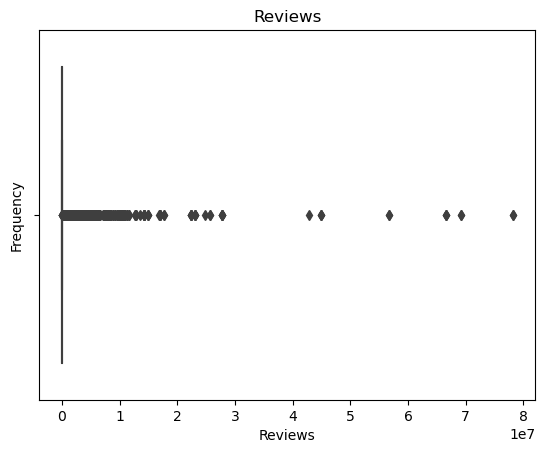

In [87]:
sns.boxplot(df['Reviews'])
plt.title('Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

In [88]:
from sklearn.preprocessing import FunctionTransformer   

log_transformer = FunctionTransformer(np.log1p)

log_transformer

FunctionTransformer(func=<ufunc 'log1p'>)

In [89]:
df['Reviews']=log_transformer.fit_transform(df['Reviews'])

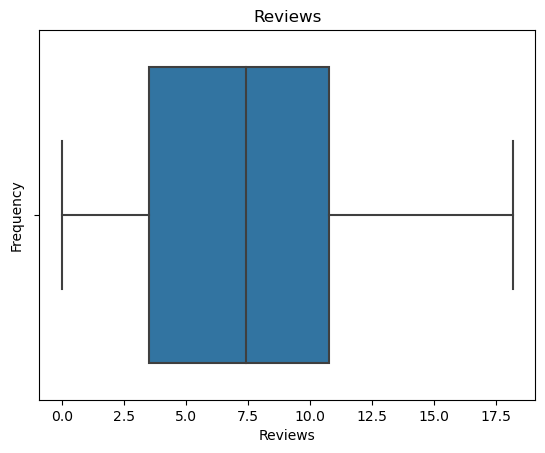

In [90]:
sns.boxplot(df['Reviews'])
plt.title('Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

# 10. Drop the columns which is redundant for the analysis

In [91]:
df=df.drop(['Last Updated','Current Ver','Android Ver'],axis=1)

In [92]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,18554.6875,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,13671.8750,500000,Free,0.0,Everyone,Art & Design;Pretend Play


# 9. EDA and Visualization

In [93]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10346.00000,10346.000000,8510.000000,1.034600e+04,10346.000000
mean,4.20377,7.254159,19559.940667,1.417266e+07,1.031561
std,0.48573,4.368172,23596.103699,8.028090e+07,16.287252
min,1.00000,0.000000,0.000977,0.000000e+00,0.000000
25%,4.10000,3.496508,0.005176,1.000000e+03,0.000000
50%,4.30000,7.432188,13671.875000,1.000000e+05,0.000000
75%,4.50000,10.749339,29296.875000,1.000000e+06,0.000000
max,5.00000,18.174247,97656.250000,1.000000e+09,400.000000


# 10. Data Visualization for numerical columns

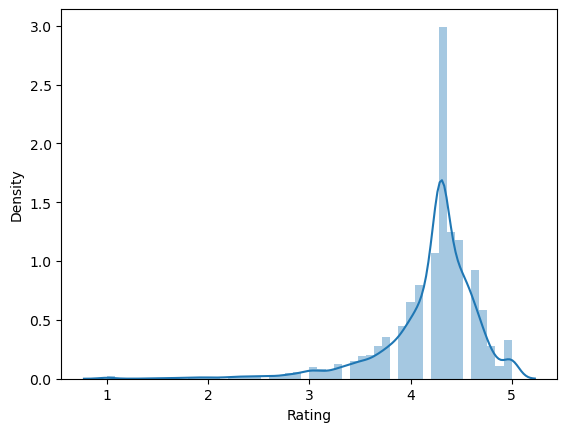

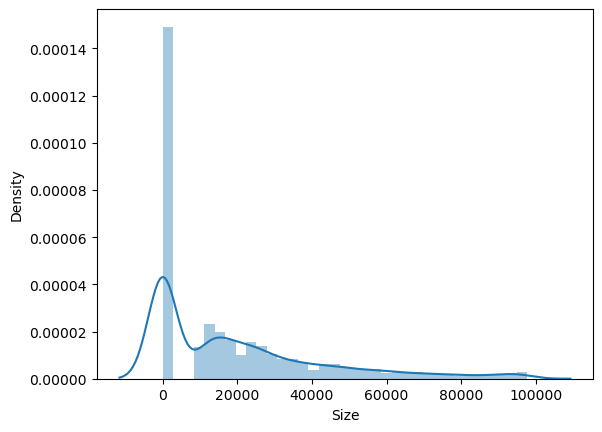

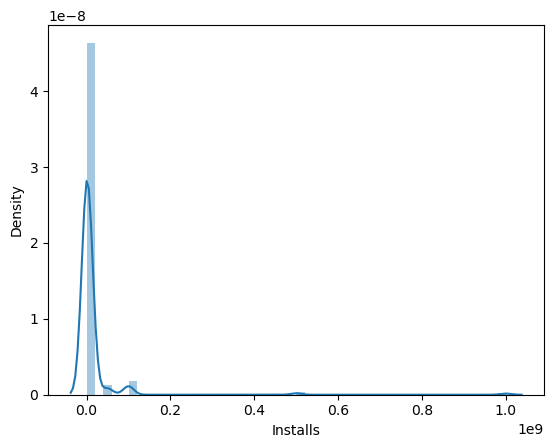

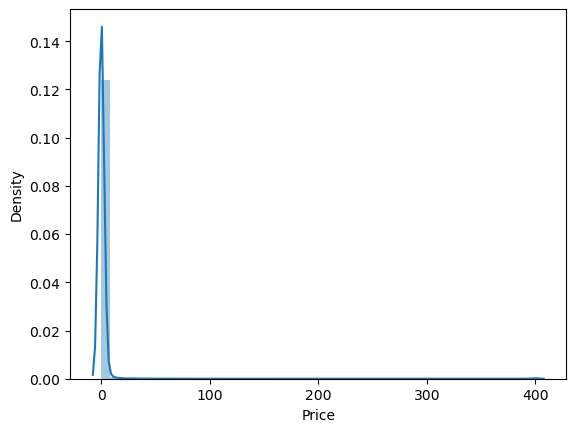

In [94]:
sns.distplot(df.Rating)
plt.show()
sns.distplot(df.Size)
plt.show()
sns.distplot(df.Installs)
plt.show()
sns.distplot(df.Price)
plt.show()

In [ ]:
Findings:
    1. Ratings display a right-skewed pattern, signifying a prevalence of highly-rated apps. 
    2. Size exhibits a left-skewed trend, indicating that most apps are smaller than 50MB. 
    3. Reviews, Installs, and Price attributes demonstrate one-sided distributions, offering limited insights.

# 11. Correlation Analysis

<Figure size 2000x1000 with 0 Axes>

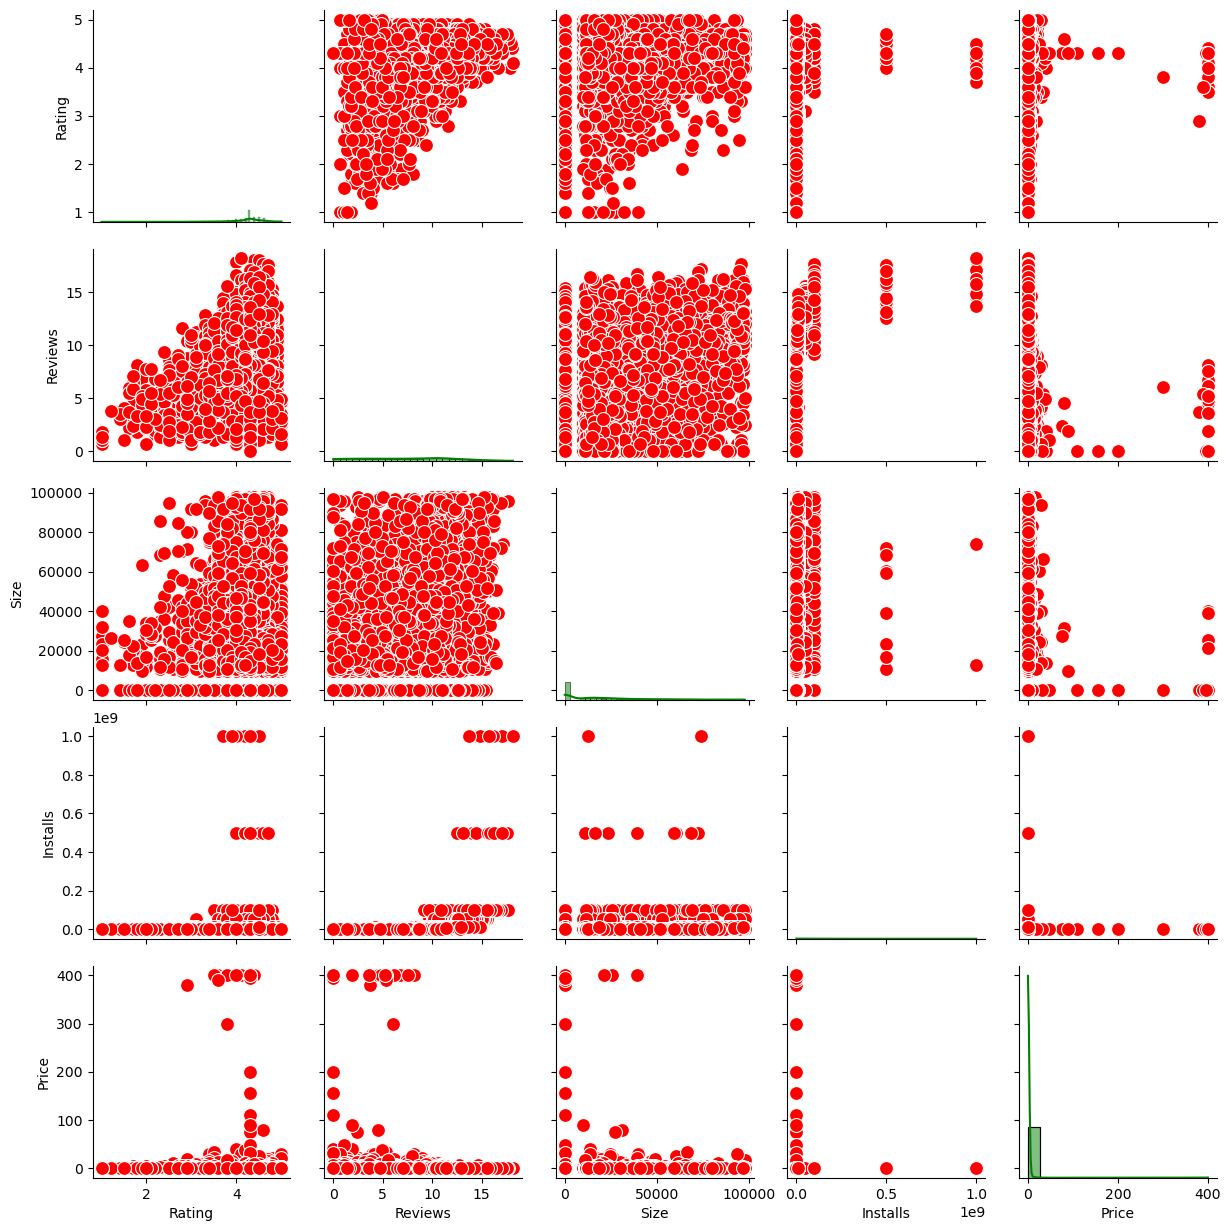

In [95]:
numerical_data = df[df.select_dtypes(include=np.number).columns]
plt.figure(figsize=(20, 10))
sns.pairplot(data=numerical_data, diag_kws=dict(color='green', kde=True), 
                 plot_kws=dict(color='red', marker='o', s=100))
plt.show()
    
    

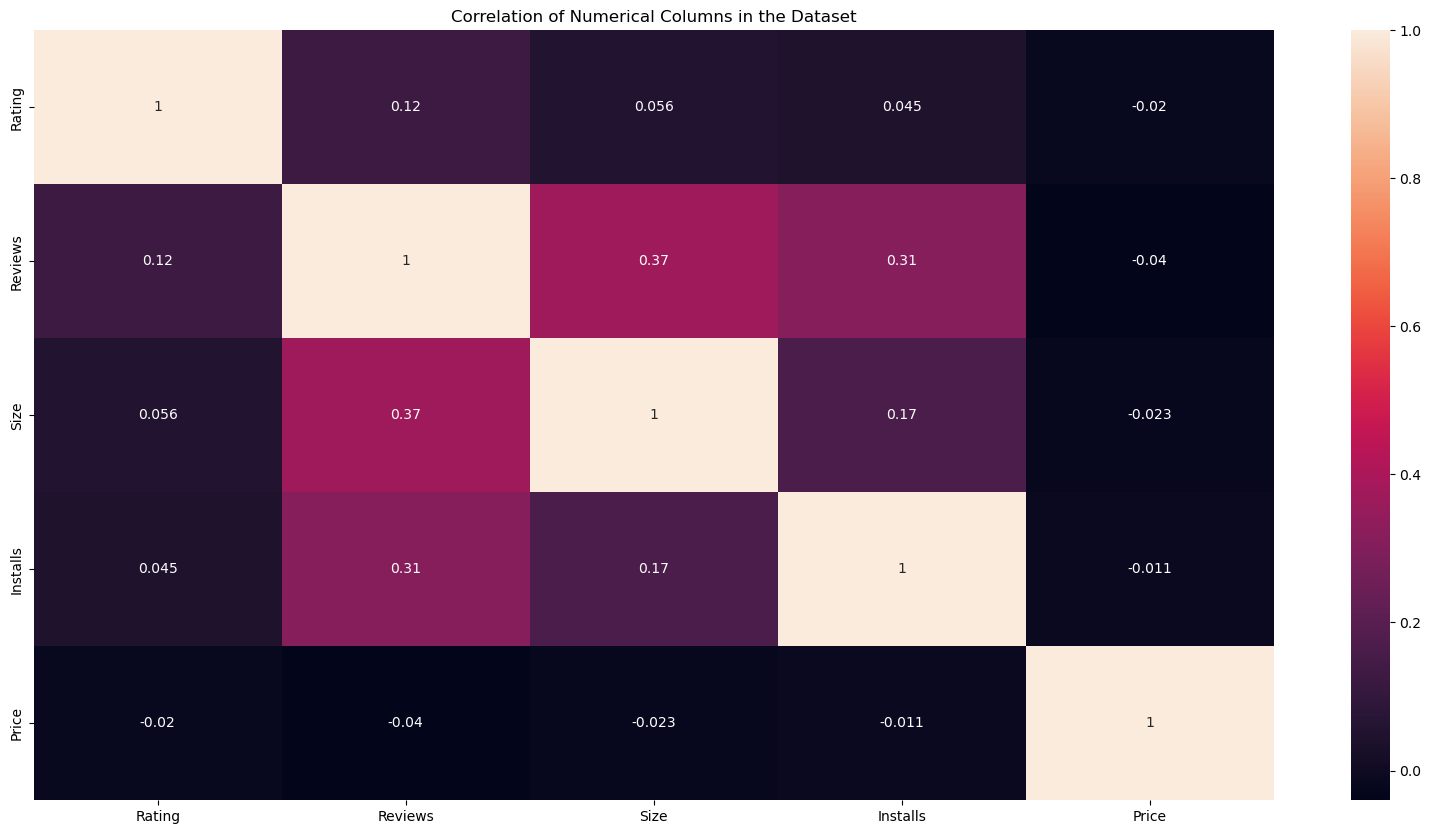

In [96]:
plt.figure(figsize=(20, 10))
plt.title('Correlation of Numerical Columns in the Dataset')
sns.heatmap(df.corr(),annot=True,)
plt.show()

In [ ]:
Observations:
    1. Installs and Reviews exhibit a strong positive correlation. 
    2. App’s download rate is significantly impacted by the number of reviews it garners.
    3. Rating is slightly positive correlated with installs,size and reviews.

# 12. Find the most popular category?

<AxesSubplot:xlabel='Category'>

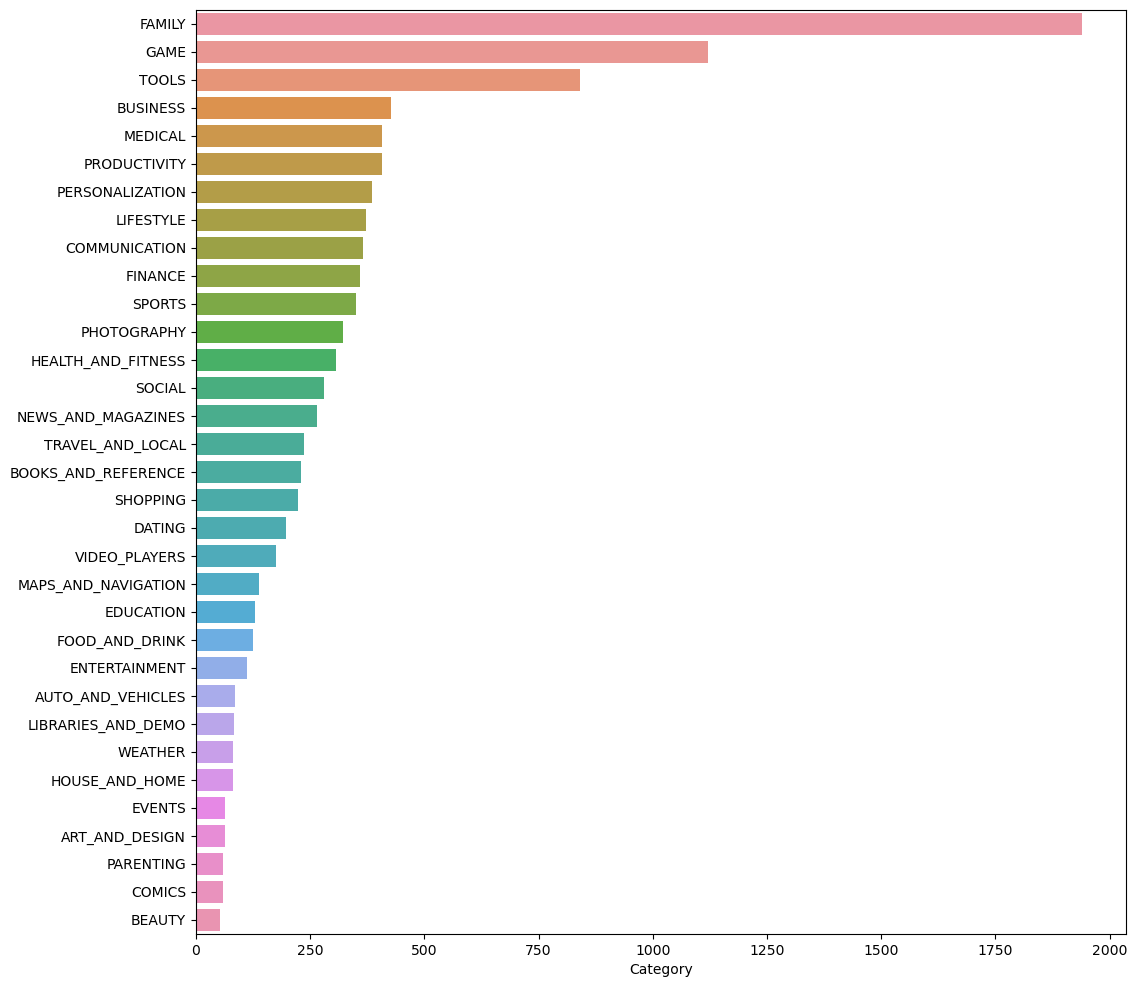

In [97]:
plt.figure(figsize=(12,12))
most_cat = df.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)

# 13. Find the mean rating categorywise 

<AxesSubplot:xlabel='Rating', ylabel='Category'>

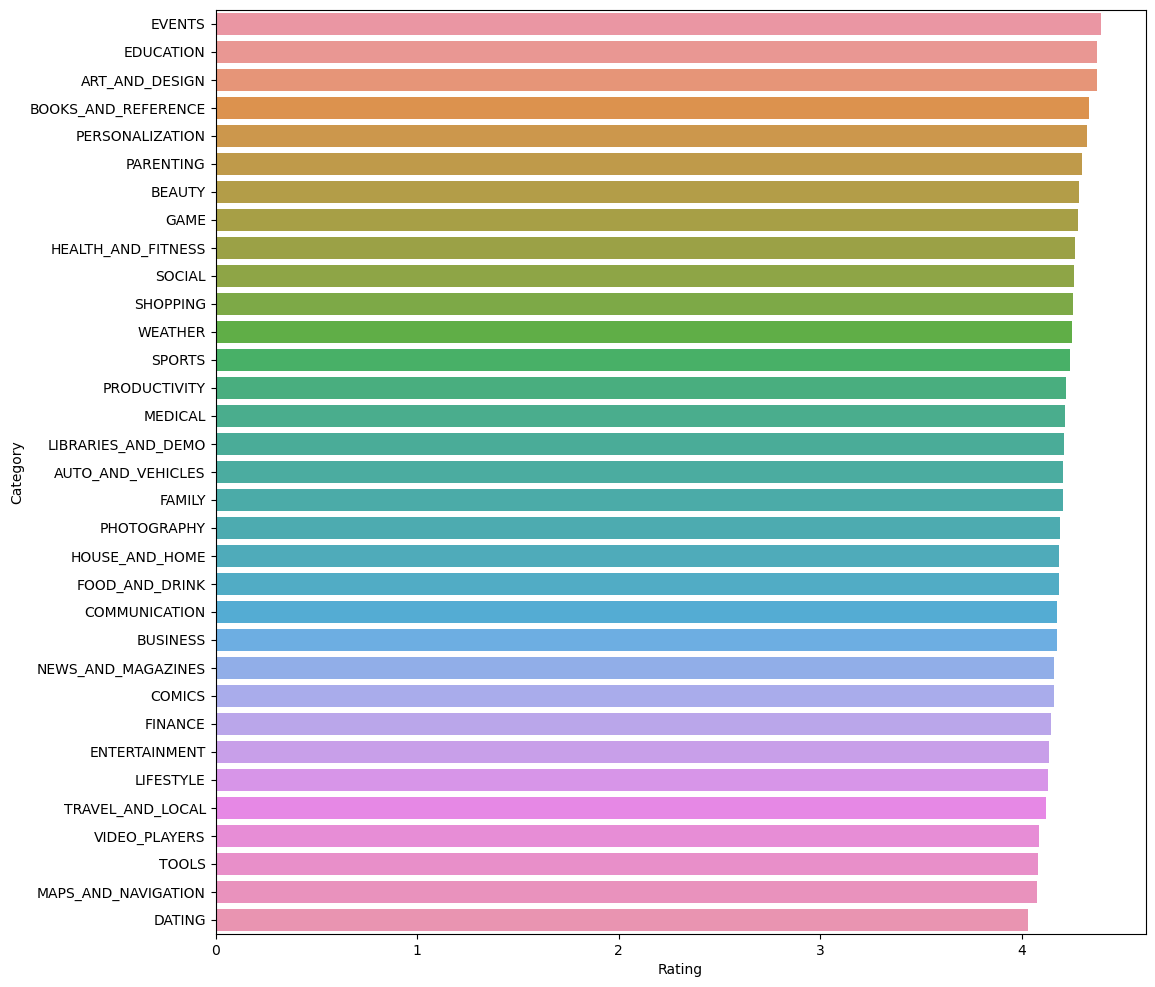

In [98]:
plt.figure(figsize=(12,12))
mean_rat = df.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rat, y=mean_rat.index, data=df)

# 14. Categorywise Installs

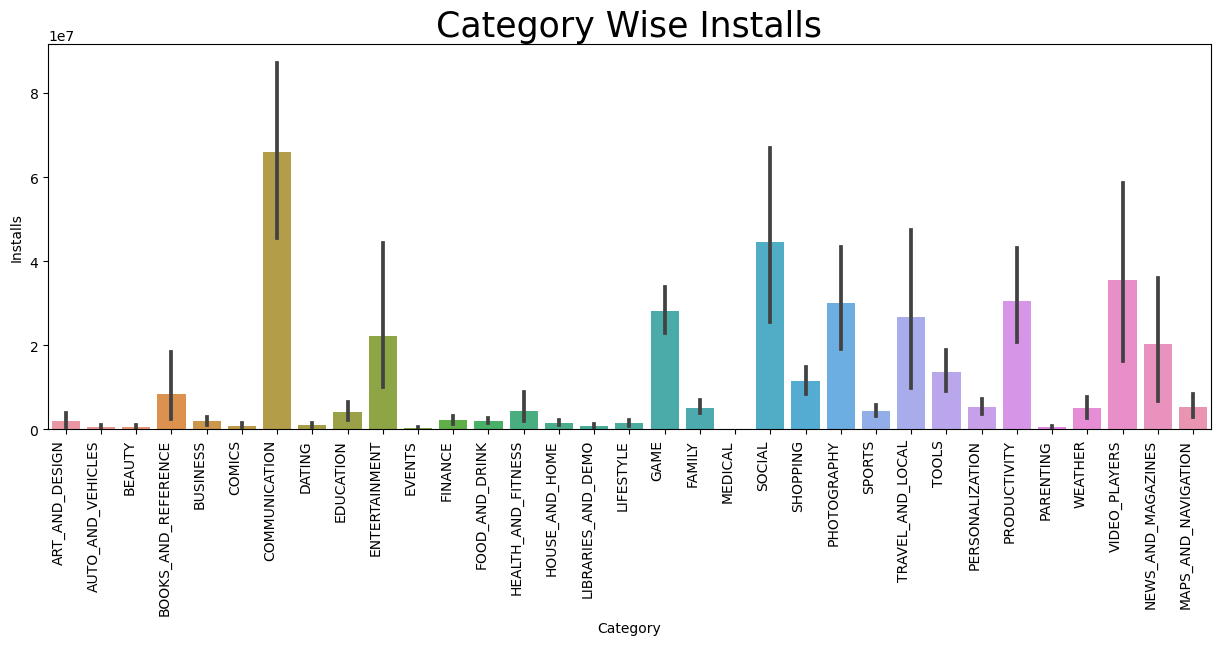

In [99]:
plt.figure(figsize=(15,5))
bar_plot=sns.barplot(x=df['Category'], y=df.Installs, data=df)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Category Wise Installs',fontsize=25)
plt.show()

In [ ]:
Obseravtions:
    1. Maximum installations is for Communication Category
    2. Eventhough the ratings are more for events the installs are less.
    3. No installs in medical category


# 15. Total Number of app titles contain Astrology

In [100]:
df['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10346, dtype: object

In [101]:
len(df[df['App'].str.contains('Astrology')])


3

# 16. Which category getting the highest average rating

In [102]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.373437
BOOKS_AND_REFERENCE    4.336681
PERSONALIZATION        4.326425
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
SHOPPING               4.256250
WEATHER                4.248780
SPORTS                 4.239031
PRODUCTIVITY           4.219410
MEDICAL                4.212990
LIBRARIES_AND_DEMO     4.208333
AUTO_AND_VEHICLES      4.205882
FAMILY                 4.203713
PHOTOGRAPHY            4.189441
HOUSE_AND_HOME         4.185000
FOOD_AND_DRINK         4.183871
COMMUNICATION          4.175410
BUSINESS               4.175176
NEWS_AND_MAGAZINES     4.160985
COMICS                 4.160000
FINANCE                4.148056
ENTERTAINMENT          4.136036
LIFESTYLE              4.133244
TRAVEL_AND_LOCAL       4.121941
VIDEO_PLAYERS          4.084000
TOOLS                  4.079667

# 17. Total number of apps having 5 star ratings

In [103]:
df[df['Rating']==5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,2.772589,36132.812500,1000,Free,0.0,Everyone,Comics
612,American Girls Mobile Numbers,DATING,5.0,1.791759,0.004297,1000,Free,0.0,Mature 17+,Dating
615,Awake Dating,DATING,5.0,1.098612,68359.375000,100,Free,0.0,Mature 17+,Dating
633,Spine- The dating app,DATING,5.0,1.791759,0.009082,500,Free,0.0,Teen,Dating
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,1.945910,0.004883,100,Free,0.0,Mature 17+,Dating
...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,2.708050,15625.000000,100,Free,0.0,Everyone,Arcade
10742,GKPB FP Online Church,LIFESTYLE,5.0,3.496508,0.007715,1000,Free,0.0,Everyone,Lifestyle
10776,Monster Ride Pro,GAME,5.0,0.693147,23437.500000,10,Free,0.0,Everyone,Racing
10820,Fr. Daoud Lamei,FAMILY,5.0,3.135494,0.008398,1000,Free,0.0,Teen,Education


In [104]:
len(df[df['Rating']==5.0])

271

# 18. App with maximum number of reviews

In [105]:
df[df['Reviews'].max()==df['Reviews']]['App']

2544    Facebook
Name: App, dtype: object

# 19. Display top 5 apps having highest review

In [106]:
index=df['Reviews'].sort_values(ascending=False).head(5).index

In [107]:
df.iloc[index]['App']

2903    High-Speed Camera (GIF,Burst)
4399                     Guns'n'Glory
370                          Telegram
4360           Super Hero M Craft Run
2968                         Futbol24
Name: App, dtype: object

# 20. Analyzing Mean Prices by Category

In [108]:
mean_price=df.groupby(['Category'])['Price'].mean().round(2).sort_values(ascending=False)
mean_price  

Category
FINANCE                8.06
LIFESTYLE              6.33
MEDICAL                2.50
EVENTS                 1.72
FAMILY                 1.25
PRODUCTIVITY           0.62
BOOKS_AND_REFERENCE    0.52
BUSINESS               0.41
WEATHER                0.40
PERSONALIZATION        0.39
PHOTOGRAPHY            0.38
TOOLS                  0.32
SPORTS                 0.28
GAME                   0.26
COMMUNICATION          0.23
HEALTH_AND_FITNESS     0.21
TRAVEL_AND_LOCAL       0.21
MAPS_AND_NAVIGATION    0.20
PARENTING              0.16
DATING                 0.16
AUTO_AND_VEHICLES      0.16
EDUCATION              0.14
ART_AND_DESIGN         0.09
FOOD_AND_DRINK         0.07
ENTERTAINMENT          0.07
SOCIAL                 0.06
VIDEO_PLAYERS          0.06
NEWS_AND_MAGAZINES     0.02
SHOPPING               0.02
LIBRARIES_AND_DEMO     0.01
COMICS                 0.00
BEAUTY                 0.00
HOUSE_AND_HOME         0.00
Name: Price, dtype: float64

# 21. Find the average rating of free and paid apps

In [109]:
df.groupby('Type')['Rating'].mean()

Type
Free    4.198560
Paid    4.269291
Name: Rating, dtype: float64

# 22. Display top 5 apps having maximum installs

In [110]:
index=df['Installs'].sort_values(ascending=False).head(5).index

In [111]:
df.iloc[index]['App']

370                             Telegram
2915                   Photo Effects Pro
3553                 Today Calendar 2017
4272    2048 BTS J Hope KPop Puzzle Game
3651                 Weather From DMI/YR
Name: App, dtype: object

# 23. Encode the categorical columns.

In [112]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() 
df['Type'] = labelencoder.fit_transform(df['Type']) 
df['Content Rating'] = labelencoder.fit_transform(df['Content Rating']) 
df['Category'] = labelencoder.fit_transform(df['Category']) 
df['App'] = labelencoder.fit_transform(df['App']) 
df['Genres'] = labelencoder.fit_transform(df['Genres']) 

In [113]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6955,0,4.1,5.075174,18554.6875,10000,0,0.0,1,9
1,2630,0,3.9,6.875232,13671.8750,500000,0,0.0,1,12
